In [1]:
import pandas as pd
import numpy as np
import yaml
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.fft import fft
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.linear_model import LinearRegression
import openpyxl
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score,precision_score, f1_score, mean_squared_error
from sklearn.metrics import average_precision_score
import xgboost as xgb
from xgboost.callback import TrainingCallback
import optuna
import talib
import json
import pickle
import torch
import os
import logging
from scipy.stats.mstats import winsorize
from plotly.subplots import make_subplots
import seaborn as sns
from imblearn.over_sampling import SMOTEN
import smogn
import warnings
from datetime import datetime, timedelta
from sklearn.utils import resample


In [3]:
all_trading_data_dfs = []
sheet_names = ['1minData1-22-2024']
for sheet in sheet_names:
    temp_df = pd.read_excel("../data/SPY_AllData.xlsx", sheet_name=sheet)
    all_trading_data_dfs.append(temp_df)
all_trading_data = pd.concat(all_trading_data_dfs, ignore_index=True)

# Load 5 min data
all_trading_data['Date'] = pd.to_datetime(all_trading_data['Date'])

In [28]:
predict_bars = 20
index = 300
n_new = 100

In [32]:
close_prices = all_trading_data['Close'].values[index-n_new:index-predict_bars]

In [33]:
orig_close_prices = all_trading_data['Close'].values[index-n_new:index]

In [34]:
date_val = all_trading_data['Date'].values[index-n_new:index]

In [35]:
fft_val_1 = np.fft.fft(close_prices)

In [38]:
n_old = n_new - predict_bars
n_old

80

In [ ]:
fft_padded = np.zeros(n_new, dtype=complex)
fft_padded[1:n_old // 2] = fft_val_1[1:n_old // 2]
fft_padded[n_old // 2 : n_old] = np.conj(np.flip(fft_val_1[1:n_old // 2]))
fft_padded[0] = fft_val_1[0]

SyntaxError: invalid syntax (2068937355.py, line 3)

In [22]:
recons_signal = np.fft.ifft(fft_val).real

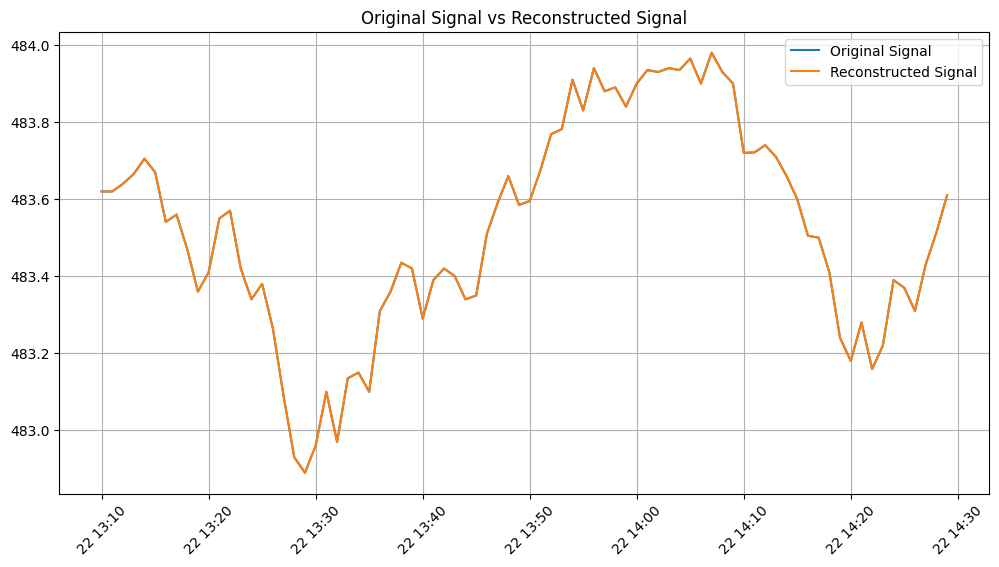

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(date_val, close_prices, label='Original Signal')
plt.plot(date_val, recons_signal, label='Reconstructed Signal')
plt.title('Original Signal vs Reconstructed Signal')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [10]:
print(f"Number of components : {len(fft_result.real)}")

Number of components : 80


In [ ]:
time_val = np.linspace(0.0, 1.0, fourier_lookback_window)


In [ ]:
print("")
real = fft_result.real[:n_components]
imag = fft_result.imag[:n_components]
mag = np.abs(fft_result)[:n_components]